In [64]:
import nltk
nltk.download('punkt')

'''
Will come back to this at a later point, Trailforks blocks access
to the login and authentication. Notes for next time:

1. Tried using BeautifulSoup and requests for basic login
2. Tried using auth token and csrf
3. Tried parsing the HTML to auto get the token csrf
4. Found a recaptcha basic text that needs to be decoded
'''

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'\nWill come back to this at a later point, Trailforks blocks access\nto the login and authentication. Notes for next time:\n'

In [65]:
# Import MTB project article
from newspaper import Article
article1 = 'https://www.mtbproject.com/trail/912234/king-of-the-mountain-golden-eagle-loop'
article2 = 'https://www.trailforks.com/trails/powerline-north-81255/'
mtb_article = Article(article1)
print('MTB Article')
print(mtb_article)

# download and parse mtb articles
mtb_article.download()
mtb_article.parse()

MTB Article


In [9]:
# mtb article and metadata/data
mtb_article.html
mtb_article.authors
mtb_article.publish_date
mtb_article.text

'Singletrack switchbacks is what you\'re in for. The trail tends to be narrower and smooth when in the open area where the ski runs are and wider and more technical in the trees. At the top, take the time to pedal up and look out over the city from the actual Sandia Crest. Most of the descent is fast with banked corners, though beware of the soft sand on the outer edges as you exit the corners especially when it\'s been dry.\n\nIf the ski area parking is closed, park on the road and ride into the lot, otherwise start by riding to the northern end of the lot and up the dirt road that loops back to the south. Take the signed singletrack on the right a short ways up for " King of the Mountain ", Falcon Ridge and another trail. Follow this through grassy switchbacks occasionally moving from one ski run to another. Eventually take another right, this one signed for " King of the Mountain " (King), at this point the climb begins to get more interesting.Through the middle portion of the climb

In [13]:
# Tokenize the MTB article into individual words

In [49]:
import mechanize
from bs4 import BeautifulSoup
import urllib3
import http.cookiejar

# login sites
site1 = "https://id.arduino.cc/auth/login/"
site2 = "https://trailforks.com/login/"
site3 = "https://www.strava.com/login"

cj = http.cookiejar.CookieJar()
br = mechanize.Browser()
br.set_cookiejar(cj)
br.open(site3)

br.select_form(nr=0)
print(br)

<input type="text" name="username-login-loginlen" size="30" id="username" autofocus="autofocus" placeholder="email or username" class="larger rounded" style="width:100%" value="">
<input type="password" name="password-password-lt200" size="30" value="" id="password" placeholder="password" class="larger rounded" style="width:100%">

<input type="email" class="Input--input--19CTT RegistrationInput--textInput--zLJDS" id="loh-email" data-cy="email" name="email" placeholder="Enter email" autocomplete="username">
<input type="password" class="Input--input--19CTT" id="loh-new-password" data-cy="password" name="password" placeholder="Create a password" autocomplete="new-password">

<Browser visiting https://www.strava.com/login
 selected form:
 <post https://www.strava.com/session application/x-www-form-urlencoded
  <HiddenControl(utf8=✓) (readonly)>
  <HiddenControl(authenticity_token=F2giGRlPH5m7EiA5UPT7MyxoRMH2spi2de8wLu7p/akTFUMOeKvSNcprcItezyiW2Bn+RM+4LcLR340pORHkmA==) (readonly)>
  <HiddenControl(plan=) (readonly)>
  <TextControl(email=)>
  <PasswordControl(password=)>
  <CheckboxControl(remember_me=[on])>
  <SubmitButtonControl(<None>=) (readonly)>>
>


In [60]:
from bs4 import BeautifulSoup as bs
import requests
stravaLogin = "https://www.strava.com/login"
trailforksLogin = "https://www.trailforks.com/login"
trailforksAuth = "https://www.trailforks.com/wosFormCheck.php"

# cookies and other credentials
cookie = 'pbid2=050fed3fe6b6420fadb0d0e250435d8b; ajs_anonymous_id=76f52744-ba75-42b7-aac0-e9b408bce600; _fbp=fb.1.1684201518482.632042561; _meta_metarouter_timezone_offset=360; _gcl_au=1.1.1744960387.1684201519; ajs_user_id=43c7a570-048a-40a6-b6d4-a002cbbfe473; afUserId=17df9082-d023-4e16-ac61-b4589f243045-p; tour_trail_detail_step=0; tf_signup_shown=1; __privaci_cookie_consent_uuid=32b8265a-9fa8-492b-b7fe-97586f5f5e4a:3; __privaci_cookie_consent_generated=32b8265a-9fa8-492b-b7fe-97586f5f5e4a:3; __privaci_cookie_consents={"consents":{"175":1,"176":1,"177":1,"178":1},"location":"NM#US","lang":"en","gpcInBrowserOnConsent":false,"gpcStatusInPortalOnConsent":false,"status":"record-consent-success","implicit_consent":false}; privacyRequest=NM; AF_SYNC=1687183348363; __stripe_mid=24189730-83df-4dbb-a402-9fc92d88b33fe28cad; homecount=2; hidewelcome=1; _meta_facebookTag_sync=1687372276453; pb2=wN8Rq2ebnwtfc7oMbvtbOzzS1S; tfs=659; __cf_bm=Rss1PC1qEkNoVV8xWVQwJGIa8bxkOGMi9y2r7VuHrWg-1687632916-0-AZegcFBfQtnJ8yVGXWecAq7I70R0mC+U+s3HGjDi4TbaQznFlFewX6fpReuEFEdmXPbixjBo0mxjxoNpCkX6xCg=; _gid=GA1.2.511528795.1687632916; _gat_gtag_UA_2380007_4=1; _meta_metarouter_sessionID=1687632916553; _gat_gtag_UA_116127418_7=1; _ga_H3Q0X2JJ93=GS1.1.1687632915.16.1.1687632917.0.0.0; _ga=GA1.1.1928614829.1684201519; g_state={"i_l":2,"i_p":1687719324940}'
recaptcha_textbasic = '03AL8dmw-ipA-4Maz8FQ1skuv6sE7EYIoQZkQsUWU8s5mSK8oM-gQjl2__XrSAm1uaovn1_wKEYuFCZqMg9Ssv9tX0R5FXk2eoDYb79INJnuCmJuPyT12zb87tIbDw_nYXLsK0exyxSr1n_SiH88SIyyTEZkO8OhLRpnuMtHAFZUJQWqnUMlYxEiQOTeaUkg9oJyTrd7C4Vqoou3CD1j5trAlVktBlPECh35W5JhLo4s4V-cPGtVQM_U0w2uIOi_Kqnyf3SAIvHFK9RfQr-kR4gPRH7vSNOzRkTSFUxPWZyANPzX9zL6OiYdVsBQsRWDHefGC1d8CVDAeZaJNldWIrY3mqv6WgHX1PVF2yq3JzJgTxpqgktBI5PhsSV4ip4zekIlAw3scQCy6N7j6WmbX1ErOIdY30WyK8Uz-bb-G4eDc64n_PGiT-OXdXQUKyRsBIRKIz7tBi6-Uti-1_efW0aEfFKkx2k6acw4lO35ZkckAKOFR9CvoI9x2W1PUMFaLL-EVMW084Do46PatOT-CT7oRALNgfwDXEeA'
formhash = '4iiEcKbbYHXfEkMaNq61li7LD8ecWgrttZ8d0XMOLp2LAgfef7Xm6qui18WuUu4AKrldPm1ziEAuBrTYEdSUjiigK/K6kn2dg3IEAU4ul4LPYC0i6jlNMt8v9DBoMFRT/Jmu5iyJB3OlIodpT4153vdM6Yi8H6HQUVXV1RDM5ItXyhvomN0lvrBCyIunSWATXfopvhlQooV0uzrkROp8ZAHM'

payload1 = {
    'email': 'jandog8990@gmail.com',
    'password': 'Scratch_4475'
}

payload2 = {
    'username-login-loginlen': 'jandog8990@gmail.com',
    'password-password-lt200': 'Scratch_4475'
}

payload3 = {
    'username': 'jandog8990@gmail.com',
    'password': 'Scratch_4475'
}

s = requests.session()
response = s.post(trailforksLogin, data=payload3)
print(response)

# with requests.Session() as s:
#     print("Trailforks login:")
#     print(trailforksLogin)
#     print(payload2)
#     p = s.post(trailforksLogin, data=payload2)
#     print(p.text)


<Response [403]>


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Access denied</title>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/errors.css" media="screen" rel="stylesheet"/>
<script>
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener("DOMContentLoaded",function(){var a=docume
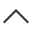

In [63]:
# Parse the form to get hidden and login fields
from bs4 import BeautifulSoup
import requests
trailforksAuth = "https://www.trailforks.com/wosFormCheck.php"
username = 'jandog8990@gmail.com',
password = 'Scratch_4475'

# cookies and other credentials
cookie = 'pbid2=050fed3fe6b6420fadb0d0e250435d8b; ajs_anonymous_id=76f52744-ba75-42b7-aac0-e9b408bce600; _fbp=fb.1.1684201518482.632042561; _meta_metarouter_timezone_offset=360; _gcl_au=1.1.1744960387.1684201519; ajs_user_id=43c7a570-048a-40a6-b6d4-a002cbbfe473; afUserId=17df9082-d023-4e16-ac61-b4589f243045-p; tour_trail_detail_step=0; tf_signup_shown=1; __privaci_cookie_consent_uuid=32b8265a-9fa8-492b-b7fe-97586f5f5e4a:3; __privaci_cookie_consent_generated=32b8265a-9fa8-492b-b7fe-97586f5f5e4a:3; __privaci_cookie_consents={"consents":{"175":1,"176":1,"177":1,"178":1},"location":"NM#US","lang":"en","gpcInBrowserOnConsent":false,"gpcStatusInPortalOnConsent":false,"status":"record-consent-success","implicit_consent":false}; privacyRequest=NM; AF_SYNC=1687183348363; __stripe_mid=24189730-83df-4dbb-a402-9fc92d88b33fe28cad; homecount=2; hidewelcome=1; _meta_facebookTag_sync=1687372276453; pb2=wN8Rq2ebnwtfc7oMbvtbOzzS1S; tfs=659; __cf_bm=Rss1PC1qEkNoVV8xWVQwJGIa8bxkOGMi9y2r7VuHrWg-1687632916-0-AZegcFBfQtnJ8yVGXWecAq7I70R0mC+U+s3HGjDi4TbaQznFlFewX6fpReuEFEdmXPbixjBo0mxjxoNpCkX6xCg=; _gid=GA1.2.511528795.1687632916; _gat_gtag_UA_2380007_4=1; _meta_metarouter_sessionID=1687632916553; _gat_gtag_UA_116127418_7=1; _ga_H3Q0X2JJ93=GS1.1.1687632915.16.1.1687632917.0.0.0; _ga=GA1.1.1928614829.1684201519; g_state={"i_l":2,"i_p":1687719324940}'
recaptcha_textbasic = '03AL8dmw-ipA-4Maz8FQ1skuv6sE7EYIoQZkQsUWU8s5mSK8oM-gQjl2__XrSAm1uaovn1_wKEYuFCZqMg9Ssv9tX0R5FXk2eoDYb79INJnuCmJuPyT12zb87tIbDw_nYXLsK0exyxSr1n_SiH88SIyyTEZkO8OhLRpnuMtHAFZUJQWqnUMlYxEiQOTeaUkg9oJyTrd7C4Vqoou3CD1j5trAlVktBlPECh35W5JhLo4s4V-cPGtVQM_U0w2uIOi_Kqnyf3SAIvHFK9RfQr-kR4gPRH7vSNOzRkTSFUxPWZyANPzX9zL6OiYdVsBQsRWDHefGC1d8CVDAeZaJNldWIrY3mqv6WgHX1PVF2yq3JzJgTxpqgktBI5PhsSV4ip4zekIlAw3scQCy6N7j6WmbX1ErOIdY30WyK8Uz-bb-G4eDc64n_PGiT-OXdXQUKyRsBIRKIz7tBi6-Uti-1_efW0aEfFKkx2k6acw4lO35ZkckAKOFR9CvoI9x2W1PUMFaLL-EVMW084Do46PatOT-CT7oRALNgfwDXEeA'
formhash = '4iiEcKbbYHXfEkMaNq61li7LD8ecWgrttZ8d0XMOLp2LAgfef7Xm6qui18WuUu4AKrldPm1ziEAuBrTYEdSUjiigK/K6kn2dg3IEAU4ul4LPYC0i6jlNMt8v9DBoMFRT/Jmu5iyJB3OlIodpT4153vdM6Yi8H6HQUVXV1RDM5ItXyhvomN0lvrBCyIunSWATXfopvhlQooV0uzrkROp8ZAHM'

with requests.session() as s:
    req = s.get(trailforksAuth).text
    html = BeautifulSoup(req, "html.parser")
    print(html)

In [47]:
# robobrowswer login
import re
import werkzeug
werkzeug.cached_property = werkzeug.utils.cached_property
from robobrowser import RoboBrowser
url1 = "https://strava.com"
url2 = "https://github.com"
browser = RoboBrowser(history=True)
browser.open(url1)
form = browser.get_form(action='/login/')
print(form)
# form["username"] = 'jandog8990'
# form["password"] = 'Scratch_4475'
# browser.session.headers['Referer'] = base_url
# browser.submit_form(form)
# print(str(browser.select))


None
